In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math as math
from matplotlib.ticker import MultipleLocator
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

incomes = np.loadtxt('incomes.txt', delimiter=',', unpack=True)

# Problem 1
## (a)

<IPython.core.display.Javascript object>


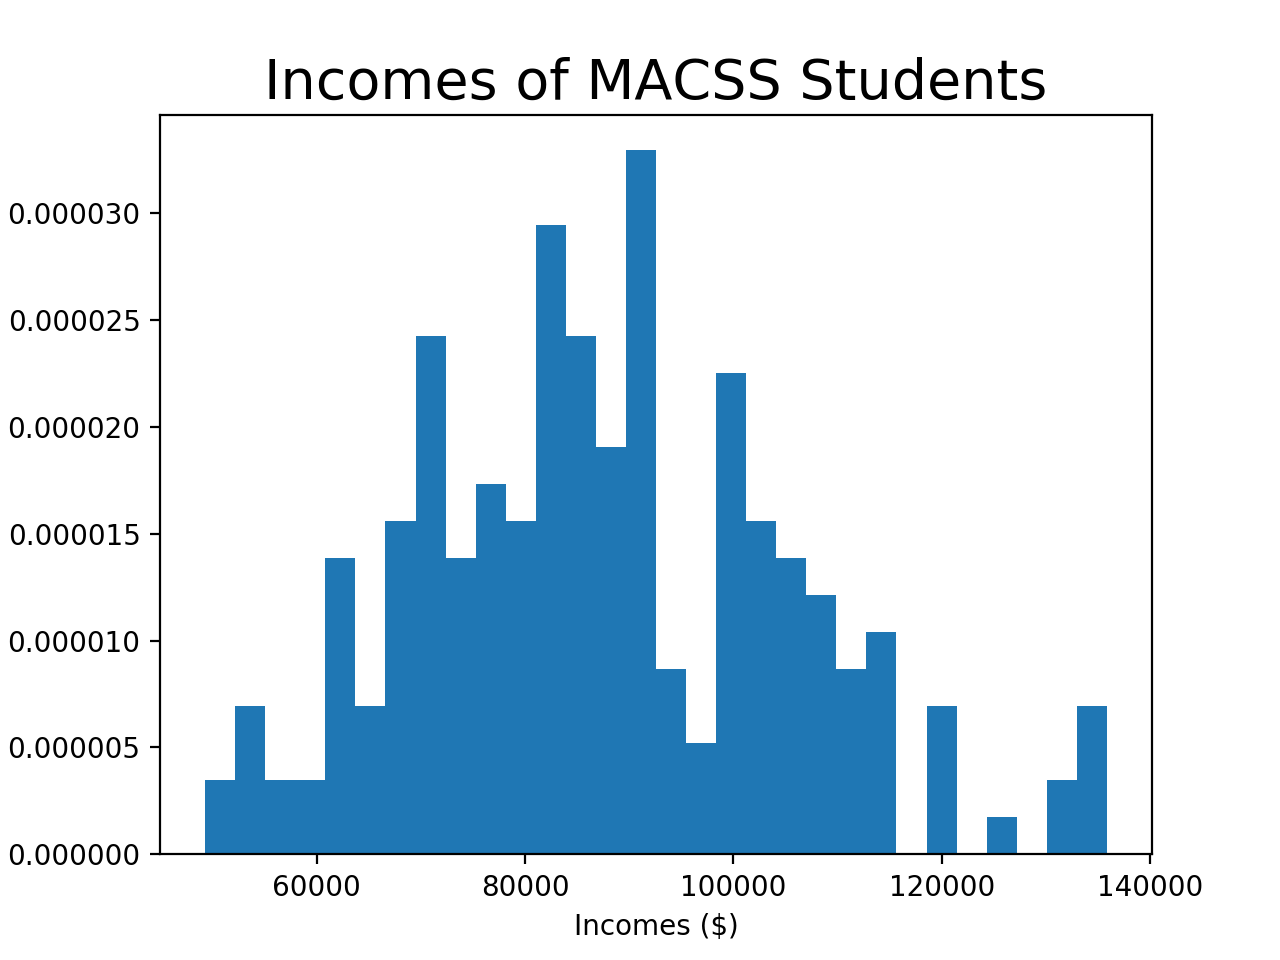

Text(0,0.5,'Percent of observations')

In [2]:
# part a
plt.hist(incomes, 30, normed=True)
plt.title('Incomes of MACSS Students', fontsize=20)
plt.xlabel(r'Incomes (\$)')
plt.ylabel('Percent of observations')
# This gives the xmin and xmax to be plotted"

## (b)

In [7]:
# part b
# Define function that generates values of a potentially trucated normal
# probability density function (PDF)
def trunc_lognorm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the log normal pdf with mean mu and standard
    deviation sigma. If the cutoff is given, then the PDF values are
    inflated upward to reflect the zero probability on values above the
    cutoff. If there is no cutoff given, this function does the same
    thing as sp.stats.lognorm.pdf(x, loc=mu, s=sigma, scale = 1).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the log-normally distributed random
             variable
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log-normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(0, loc=mu, s=sigma, scale=1)
    else:
        prob_notcut = (sts.lognorm.cdf(cutoff, loc=mu, s=sigma, scale=1) -
                       sts.lognorm.cdf(0, loc=mu, s=sigma, scale=1))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

## (c)

In [9]:
# part c
# Define log likelihood function for the normal distribution
def log_lik_trunclognorm(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the log-normally distributed random
             variable
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        lognorm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, log-normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = trunc_lognorm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val
mu_1 = 11.0
sig_1 = 0.5

print('Log-likelihood: ', log_lik_trunclognorm(incomes, mu_1, sig_1, 150000))

Log-likelihood:  -2385.85699781


In [10]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_trunclognorm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [26]:
import scipy.optimize as opt

mu_init = 11  # mu_1
sig_init = 0.5  # sig_1
params_init = np.array([mu_init, sig_init])
mle_args = (incomes, 150000)
results = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',
                       bounds=((0.1, None), (0.1, None)))
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
results

mu_MLE= 11.3590243967  sig_MLE= 0.208178530156


      fun: 2241.7193013685201
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00645741,  0.01114131])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 10
   status: 0
  success: True
        x: array([ 11.3590244 ,   0.20817853])

<IPython.core.display.Javascript object>


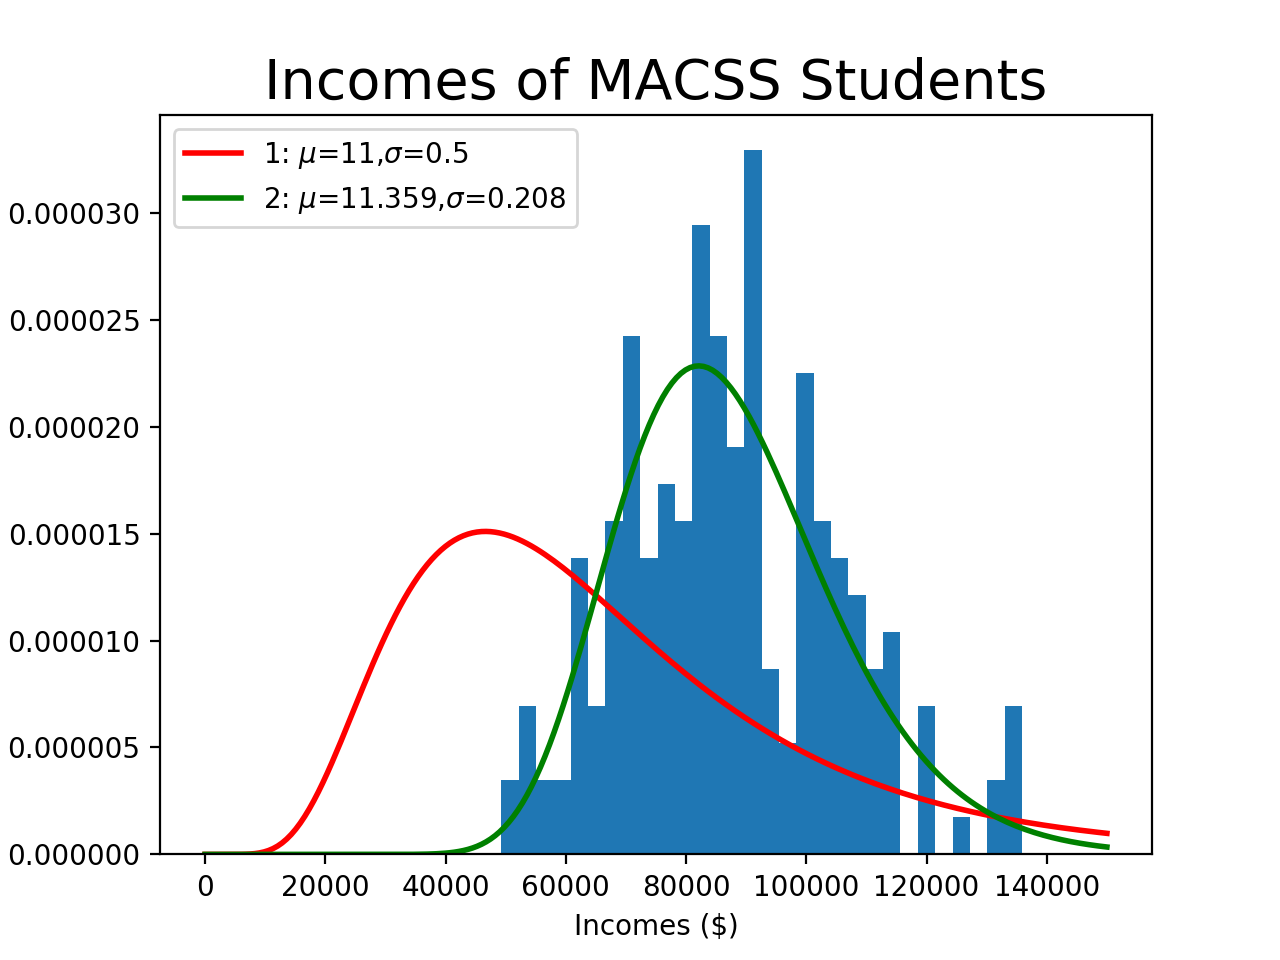

In [33]:
# plot MLE against histrogram and pdf in part b
plt.hist(incomes, 30, normed=True)
plt.title('Incomes of MACSS Students', fontsize=20)
plt.xlabel(r'Incomes (\$)')
plt.ylabel('Percent of observations')
# This gives the xmin and xmax to be plotted"

#plot the PDF against the PDF in part (b)
dist_pts = np.linspace(1e-10, 150000, 200)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_1, sig_1, 150000),
         linewidth=2, color='r', label='1: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_MLE, sig_MLE, 150000),
         linewidth=2, color='g', label='2: $\mu$=11.359,$\sigma$=0.208')
plt.legend(loc='upper left')

In [29]:
print('Log-likelihood 1: ', log_lik_trunclognorm(incomes, mu_1, sig_1, 150000))
print('MLE log-likelihood 3: ', log_lik_trunclognorm(incomes, mu_MLE, sig_MLE, 150000))

Log-likelihood 1:  -2385.85699781
MLE log-likelihood 3:  -2241.71930137


In [30]:
# The Variance-Covariance Matrix
results
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[ 0.00022521 -0.00022521]
 [-0.00010284  0.00010284]]
Standard error for mu estimate =  0.0150070140551
Standard error for sigma estimate =  0.0101408188183


## (d)

In [31]:
# part d
log_lik_h0 = log_lik_trunclognorm(incomes, mu_1, sig_1, 150000)
log_lik_mle = log_lik_trunclognorm(incomes, mu_MLE, sig_MLE, 150000)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


## (e)

In [32]:
from scipy.integrate import quad
more_than_100000 = quad(trunc_lognorm_pdf, 100000, 150000, args = (mu_MLE, sig_MLE, 150000))
less_than_75000 = quad(trunc_lognorm_pdf, 1e-10, 75000, args = (mu_MLE, sig_MLE, 150000))
print("The probability that I will earn more than $100,000 is:", more_than_100000[0])
print("The probability that I will earn less than $75,000 is:", less_than_75000[0])

The probability that I will earn more than $100,000 is: 0.2262648386237647
The probability that I will earn less than $75,000 is: 0.2602332979233371


# Problem 2
## (a)

In [38]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

sick, age, children, temp = np.loadtxt('sick.txt', delimiter=',', skiprows = 1, unpack=True)

In [39]:
print(max(sick), min(sick))
print(max(age), min(age))
print(max(children), min(children))
print(max(temp), min(temp))

2.8 0.04
74.89 12.81
4.96 0.0
68.6 16.5


In [40]:
import pandas as pd
df = pd.read_table('sick.txt', delimiter=',')
import statsmodels.formula.api as smf
lm = smf.ols(formula='sick ~ age + children + avgtemp_winter', data=df).fit()
print(lm.params)

Intercept         0.251641
age               0.012934
children          0.400499
avgtemp_winter   -0.009992
dtype: float64


In [52]:
def get_error_vals(sick_vals, age_val, children_val, temp_val, beta_0, beta_1, beta_2, beta_3):
    error_vals = sick_vals - beta_0 - beta_1 * age_val - beta_2 * children_val - beta_3 * temp_val
    return error_vals

def error_pdf(error_vals, sigma):
    pdf_val = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (error_vals)**2 / (2 * sigma**2))))
    return pdf_val



In [66]:
def log_lik_sick(sick_vals, age_val, children_val, temp_val, 
                 beta_0, beta_1, beta_2, beta_3, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    error_vals = get_error_vals(sick_vals, age_val, children_val, 
                        temp_val, beta_0, beta_1, beta_2, beta_3)
    pdf_vals = error_pdf(error_vals, sigma)
    N = len(error_vals)
    log_lik_val = (-N/2) * np.log(2 * np.pi) - (N/2) * np.log(sigma**2)\
    - (1 / (2 * sigma**2)) * np.sum(error_vals ** 2)
    
    
    return log_lik_val

In [67]:
def crit_sick(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    beta_0, beta_1, beta_2, beta_3, sigma = params
    sick_vals, age_val, children_val, temp_val = args
    log_lik_val = log_lik_sick(sick_vals, age_val, children_val,
                               temp_val, beta_0, beta_1, beta_2, 
                               beta_3, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [68]:
import scipy.optimize as opt
beta_0_init = 0.2
beta_1_init = 0.01
beta_2_init = 0.4
beta_3_init = 0
sig_init = 0.05 # sig_2
params_init = np.array([beta_0_init, beta_1_init, 
                        beta_2_init, beta_3_init, sig_init])
mle_args = (sick, age, children, temp)
bnds = ((0.1, None), (0.01, None),
         (0.1, None), (None, -0.001), (0.001, None))
results = opt.minimize(crit_sick, params_init, args=(mle_args), method = 'L-BFGS-B', 
                      bounds = bnds)
beta_0_MLE, beta_1_MLE, beta_2_MLE, beta_3_MLE, sig_MLE = results.x
print('beta0 MLE =', beta_0_MLE, 'beta1 MLE =', beta_1_MLE, 
      'beta2 MLE =', beta_2_MLE, 'beta3 MLE =', beta_3_MLE, 
      'sig MLE=', sig_MLE)

beta0 MLE = 0.25164413254 beta1 MLE = 0.0129334993905 beta2 MLE = 0.400500820495 beta3 MLE = -0.00999171443749 sig MLE= 0.00301769584773


In [69]:
results

      fun: -876.86506829061727
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.26201485,  -8.90044021,  -0.79760412, -25.13937716,   0.50746394])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 492
      nit: 44
   status: 0
  success: True
        x: array([ 0.25164413,  0.0129335 ,  0.40050082, -0.00999171,  0.0030177 ])

In [70]:
print('MLE log-likelihood: ', log_lik_sick(sick, age, children, temp, beta_0_MLE, 
                                           beta_1_MLE, beta_2_MLE, beta_3_MLE, sig_MLE,))

MLE log-likelihood:  876.865068291


In [82]:
results
vcv_MLE = results.hess_inv.todense()
print("variance-covariane matrix is:", vcv_MLE)

variance-covariane matrix is: [[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## (b)

In [86]:
log_lik_h0 = log_lik_sick(sick, age, children, temp, 1.0, 0, 0, 0, 0.01)
log_lik_mle = log_lik_sick(sick, age, children, temp, 
                           beta_0_MLE, beta_1_MLE, beta_2_MLE, beta_3_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('The likelihood that age, number of children and \
average winter temperature has no effect on the number of sick days is:', pval_h0)

The likelihood that age, number of children and average winter temperature has no effect on the number of sick days is: 0.0


Therefore, we reject H0. 